In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
BatchSize=32
ImageSize=256
Channel=3
Epochs=30

In [ ]:
import tensorflow as tf

# Update the path to your dataset
directory = '/content/drive/MyDrive/Colab Notebooks/potato'

# Create a dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    image_size=(ImageSize, ImageSize),  # Resize images to 256x256
    batch_size=BatchSize          # Number of images to return in each batch
)

# # Display the first batch of images and labels
# for images, labels in dataset.take(1):
#     print(images.shape, labels.shape)


Found 3910 files belonging to 3 classes.


In [1]:
class_name=dataset.class_names

NameError: name 'dataset' is not defined

(32, 256, 256, 3)
[2 1 2 0 1 2 2 2 1 2 0 2 1 0 1 2 2 2 2 0 1 1 2 2 1 2 0 0 0 0 1 2]


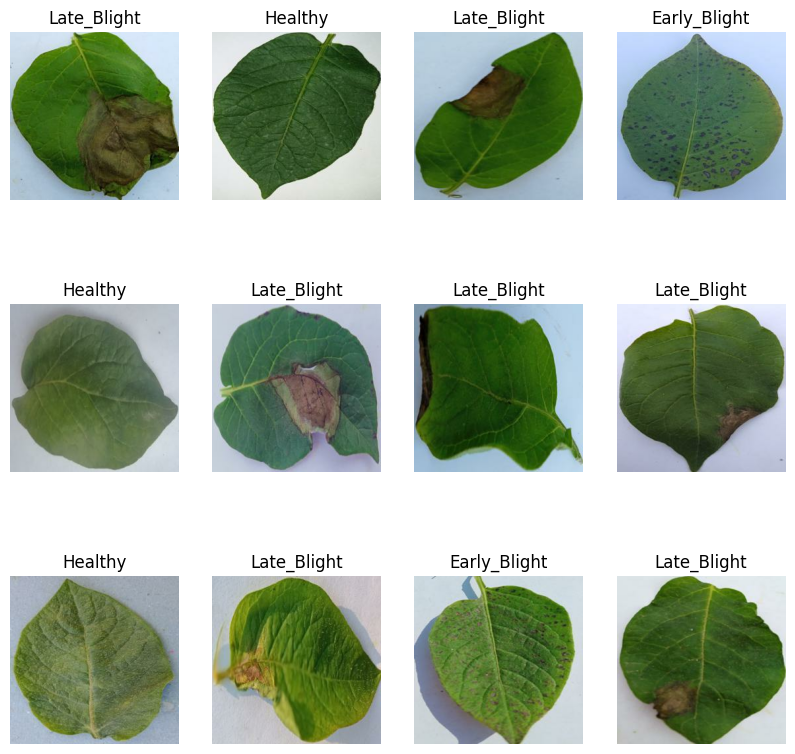

In [ ]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12):
        ax = plt.subplot(3,4,i+1)

        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[labels_batch[i]])
        plt.axis("off")


In [ ]:
train_size=0.8
len(dataset)*train_size

98.4

In [ ]:
train_ds=dataset.take(98)

In [ ]:
len(train_ds)

98

In [ ]:
test_ds=dataset.skip(98)

In [ ]:
len(test_ds)

25

In [ ]:
val_size=0.1
len(dataset)*val_size

12.3

In [ ]:
val_ds=test_ds.take(12)
len(val_ds)

12

In [ ]:
test_ds=test_ds.skip(12)
len(test_ds)

13

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split+val_split+test_split)==1

    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

98

In [ ]:
len(val_ds)

12

In [ ]:
len(test_ds)

13

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)


[[[0.9137255  0.9843137  0.9843137 ]
  [0.9137255  0.9843137  0.9843137 ]
  [0.91764706 0.9882353  0.9882353 ]
  ...
  [0.87058824 0.9490196  0.99215686]
  [0.87058824 0.9490196  0.99215686]
  [0.87058824 0.9490196  0.99215686]]

 [[0.9137255  0.9843137  0.9843137 ]
  [0.9137255  0.9843137  0.9843137 ]
  [0.91764706 0.9882353  0.9882353 ]
  ...
  [0.87058824 0.9490196  0.99215686]
  [0.87058824 0.9490196  0.99215686]
  [0.87058824 0.9490196  0.99215686]]

 [[0.9137255  0.9843137  0.9843137 ]
  [0.9137255  0.9843137  0.9843137 ]
  [0.91764706 0.9882353  0.9882353 ]
  ...
  [0.87058824 0.9490196  0.99215686]
  [0.87058824 0.9490196  0.99215686]
  [0.87058824 0.9490196  0.99215686]]

 ...

 [[0.9098039  0.99215686 0.972549  ]
  [0.9098039  0.99215686 0.972549  ]
  [0.9098039  0.9882353  0.98039216]
  ...
  [0.75686276 0.827451   0.9843137 ]
  [0.75686276 0.827451   0.9843137 ]
  [0.75686276 0.827451   0.9843137 ]]

 [[0.9098039  0.99215686 0.972549  ]
  [0.9098039  0.99215686 0.972549  ]


In [ ]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].shape)


(256, 256, 3)


In [ ]:
from tensorflow.keras import layers, Sequential

resize_and_rescale = Sequential([
    layers.Resizing(ImageSize, ImageSize),
    layers.Rescaling(1.0/255)
])


In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])


In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers, models, regularizers

In [ ]:
input_shape = (BatchSize,ImageSize,ImageSize,Channel)
n_classes=3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),

    layers.Dropout(0.5),  # Adding Dropout layer with 50% dropout rate
    layers.Dense(64, activation='relu'),  # Fully Connected + ReLU layer
    layers.Dense(64, kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization
    layers.Activation('relu'),  # ReLU activation


    layers.Dense(n_classes,activation='softmax')
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_ds,
    epochs=Epochs,
    batch_size=BatchSize,
    verbose=1,
    validation_data=val_ds
    )

Epoch 1/30
98/98 [==============================] - 118s 206ms/step - loss: 1.4827 - accuracy: 0.3727 - val_loss: 1.3041 - val_accuracy: 0.3542
Epoch 2/30
98/98 [==============================] - 6s 60ms/step - loss: 1.1877 - accuracy: 0.4241 - val_loss: 1.1099 - val_accuracy: 0.5286
Epoch 3/30
98/98 [==============================] - 6s 62ms/step - loss: 1.0625 - accuracy: 0.5363 - val_loss: 1.0073 - val_accuracy: 0.6250
Epoch 4/30
98/98 [==============================] - 6s 60ms/step - loss: 0.9655 - accuracy: 0.5756 - val_loss: 0.9536 - val_accuracy: 0.5625
Epoch 5/30
98/98 [==============================] - 6s 61ms/step - loss: 0.9217 - accuracy: 0.5855 - val_loss: 0.9045 - val_accuracy: 0.5781
Epoch 6/30
98/98 [==============================] - 6s 61ms/step - loss: 0.8317 - accuracy: 0.6379 - val_loss: 0.8346 - val_accuracy: 0.6615
Epoch 7/30
98/98 [==============================] - 6s 60ms/step - loss: 0.7164 - accuracy: 0.7254 - val_loss: 0.8160 - val_accuracy: 0.6380
Epoch 8/30

In [ ]:
score = model.evaluate(test_ds)

13/13 [==============================] - 12s 28ms/step - loss: 0.0609 - accuracy: 0.9880


In [ ]:
score

[0.06085270270705223, 0.9879807829856873]

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 98}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
len(history.history['loss'])

30

In [ ]:
len(history.history['accuracy'])

30

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

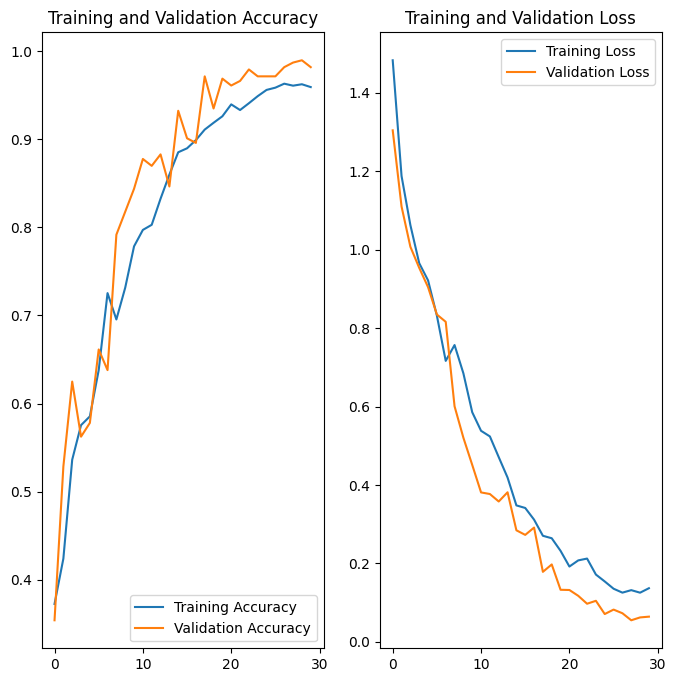

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(Epochs), acc, label='Training Accuracy')
plt.plot(range(Epochs), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(Epochs), loss, label='Training Loss')
plt.plot(range(Epochs), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')


First image to predict


TypeError: list indices must be integers or slices, not method

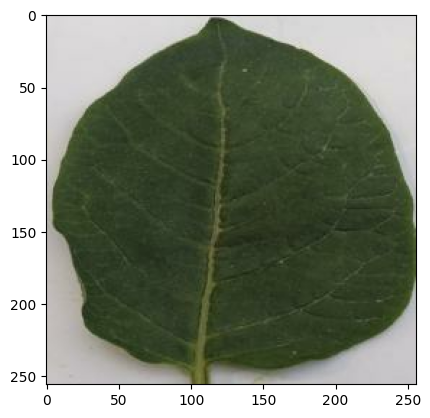

In [ ]:
import numpy as np
for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label :",class_name[labels_batch[0].numpy])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label :", class_name[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model , img):
    img_arry = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_arry=tf.expand_dims(img_arry, 0) #create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100* (np.max(predictions[0])),2)
    return predicted_class, confidence

NameError: name 'img_array' is not defined

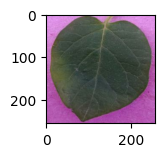

In [ ]:
for images, labels in test_ds.take(1):
    for i in range(9):
        ax= plt.subplot(3,3,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class , confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual : {actual_class}, \n Predicted : {predicted_class}, \n Confidence : {confidence}%")
#         plt.axis("off")

In [ ]:
# Example: Save the entire model
model.save('/content/drive/MyDrive/Colab Notebooks/PDDCUD.h5')

# # Example: Save only the weights
# # model.save_weights('/path/to/save/weights')
# # Example: Load the entire model
# loaded_model = tf.keras.models.load_model('/path/to/save/model')
# # Example: Create a new model with the same architecture
# model = create_model()  # Define your model architecture function

# # Load weights into the model
# model.load_weights('/path/to/save/weights')
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Example: Define and compile a simple model
# def create_model():
#     model = Sequential([
#         Dense(64, activation='relu', input_shape=(100,)),
#         Dense(10, activation='softmax')
#     ])
#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
#     return model

# # Example: Train the model
# model = create_model()
# model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# # Example: Save the entire model
# model.save('/path/to/save/model')

# # Example: Load the entire model
# loaded_model = tf.keras.models.load_model('/path/to/save/model')

# # Example: Use the loaded model for prediction
# predictions = loaded_model.predict(x_test)



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os

save_path = '/content/drive/MyDrive/Colab Notebooks/PDDCUD.h5'

# Check if the file exists
if os.path.exists(save_path):
    print(f"Model saved successfully at: {save_path}")
else:
    print(f"Model save failed. File not found at: {save_path}")



Model saved successfully at: /content/drive/MyDrive/Colab Notebooks/PDDCUD.h5


In [1]:
a=10
b=20
c=a+b
print(c)

30


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('E:/AI/FYP_v2/PDDCUD.h5')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))  # Change target_size to match your model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize to [0,1] if required by your model
    return img_array

# Path to the test image
test_image_path = 'E:/AI/FYP_v2/potato/Early_Blight/Early_Blight_ (864)'

# Load and preprocess the image
preprocessed_image = load_and_preprocess_image(test_image_path)

# Make predictions
predictions = model.predict(preprocessed_image)

# Decode the predictions if necessary
predicted_class = np.argmax(predictions, axis=1)
print(f'Predicted class: {predicted_class}')


C:\Users\PERVEZ ABBAS\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


TypeError: <class 'keras.src.losses.losses.SparseCategoricalCrossentropy'> could not be deserialized properly. Please ensure that components that are Python object instances (layers, models, etc.) returned by `get_config()` are explicitly deserialized in the model's `from_config()` method.

config={'module': 'keras.losses', 'class_name': 'SparseCategoricalCrossentropy', 'config': {'reduction': 'auto', 'name': 'sparse_categorical_crossentropy', 'from_logits': False, 'ignore_class': None, 'fn': 'sparse_categorical_crossentropy'}, 'registered_name': None}.

Exception encountered: SparseCategoricalCrossentropy.__init__() got an unexpected keyword argument 'fn'